In [1]:
#include <TChain.h>
#include <vector>
#include <TFile.h>
#include <iostream>
#include <string>
#include <stdio.h>
#include <cmath>

In [2]:
//float lumi = 0.5;
//float lumi = 1.9 # fb-1 # data_B only
//float lumi = 2.9 # fb-1 # data_C only
//float lumi = 4.7 # fb-1 # data_D only
float lumi = 10; // fb-1 // data_A,data_B,data_C,data_D

float fraction = 1.0; // reduce this is you want the code to run quicker

TString path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/" // web address

(TString &) "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/"[75]


In [3]:
TChain *data_chain = new TChain("mini");
data_chain->AddFile(path + "data_A.GamGam.root");
data_chain->AddFile(path + "data_B.GamGam.root");
data_chain->AddFile(path + "data_C.GamGam.root");
data_chain->AddFile(path + "data_D.GamGam.root");
int nentries = data_chain->GetEntries();
cout << nentries << endl;

7798424


In [4]:
vector<float>   *photon_pt;
vector<float>   *photon_eta;
vector<float>   *photon_phi;
vector<float>   *photon_E;
vector<bool>    *photon_isTightID;
vector<float>   *photon_etcone20;
Bool_t trigP;
UInt_t photon_n;

data_chain->SetBranchAddress("photon_pt", &photon_pt);
data_chain->SetBranchAddress("photon_eta", &photon_eta);
data_chain->SetBranchAddress("photon_phi", &photon_phi);
data_chain->SetBranchAddress("photon_E", &photon_E);
data_chain->SetBranchAddress("photon_isTightID", &photon_isTightID);
data_chain->SetBranchAddress("photon_etcone20", &photon_etcone20);
data_chain->SetBranchAddress("trigP", &trigP);
data_chain->SetBranchAddress("photon_n", &photon_n);

In [5]:
data_chain->Print()

******************************************************************************
*Chain   :mini      : https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/data_A.GamGam.root *
******************************************************************************
******************************************************************************
*Tree    :mini      : mini                                                   *
*Entries :   430344 : Total =       415933847 bytes  File  Size =   81295914 *
*        :          : Tree compression factor =   4.64                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :   430344 : Total  Size=    1722205 bytes  File Size  =       5901 *
*Baskets :        2 : Basket Size=    1890304 bytes  Compression= 195.35     *
*............................................................................*
*Br    1 :eve

In [6]:
TCanvas *canvas = new TCanvas();
TH1F *hist = new TH1F("Hyy_invmass", "Diphoton invariant mass ; Invariant Mass m_{yy} [GeV] ; Events",30,100,160);
TGraphErrors *graph = new TGraphErrors(); 

In [7]:
/*
bool implemented_cuts(vector<bool> photon_isTightID, vector<float> photon_pt, vector<float> photon_etcone20, 
                       vector<float> photon_eta)
{
    bool good_event = false;
    bool TightID = false;   
    bool Pt = false;
    bool Etcone20 = false;
    bool Eta = false;
    
    // Cut on photon reconstruction quality
    if((photon_isTightID[0]==true) && (photon_isTightID[1]==true))
    {
        TightID = true;
    }
    
    // Cut on Transverse momentum, want to keep events where photon_pt[0]>40000 MeV and photon_pt[1]>30000 MeV
    if((photon_pt[0]>40000) && (photon_pt[1]>30000))
    {
        Pt = true;
    }
    
    // Cut on energy isolation, Photon candidates are required to have an isolation transverse energy of less than 4 GeV
    if((photon_etcone20[0]<4000) && (photon_etcone20[1]<4000))
    {
        Etcone20 = true;
    }
    
    // Cut on pseudorapidity in barrel/end-cap transition region, excluding the 
    // calorimeter barrel/end-cap transition region 1.37 < |η| < 1.52
    if( ((TMath::Abs(photon_eta[0])>1.52) || (TMath::Abs(photon_eta[0])<1.37)) 
       && ((TMath::Abs(photon_eta[1])>1.52) || (TMath::Abs(photon_eta[1]))) )
    {
        Eta = true;
    }
    
    if (TightID==true && Pt==true && Etcone20==true && Eta==true)
    {
        good_event = true;
    }
    
    return good_event;
}
*/

In [8]:
/*
bool implemented_cuts(vector<bool> photon_isTightID, vector<float> photon_pt, vector<float> photon_etcone20, 
                       vector<float> photon_eta)
{
    bool accepted_event = false;
    // Cut on photon reconstruction quality
    if((photon_isTightID[0]==true) && (photon_isTightID[1]==true)) 
    {
        // Cut on Transverse momentum, want to keep events where photon_pt[0]>40000 MeV and photon_pt[1]>30000 MeV
        if((photon_pt[0]>40000) && (photon_pt[1]>30000))
        {
            // Cut on energy isolation, Photon candidates are required to have an isolation transverse energy of less than 4 GeV
            if((photon_etcone20[0]<4000) && (photon_etcone20[1]<4000))
            {
                // Cut on pseudorapidity in barrel/end-cap transition region, excluding the 
                // calorimeter barrel/end-cap transition region 1.37 < |η| < 1.52
                if( ((TMath::Abs(photon_eta[0])>1.52) || (TMath::Abs(photon_eta[0])<1.37)) 
                   && ((TMath::Abs(photon_eta[1])>1.52) || (TMath::Abs(photon_eta[1]))) )
                {
                    accepted_event = true;
                }
            }
        } 
        
    }
    
    return accepted_event;
}
*/

In [9]:
bool implemented_cuts(vector<bool> photon_isTightID, vector<float> photon_pt, vector<float> photon_etcone20, 
                       vector<float> photon_eta, Bool_t trigP)
{
    bool accepted_event = false;
    // Preselection of good photons
    int goodphoton_index[5];
    int goodphoton_n = 0;
    int photon_index =0;
    
    if(trigP)
    {   
        for(unsigned int ii=0; ii<photon_n; ii++)
        {
            // photons are tight
            if( photon_isTightID[ii] )
            {
                // photons with 25 GeV and excluding the transition region between the barrel and endcap calorimeters
                if( photon_pt[ii] >25000. && TMath::Abs(photon_eta[ii])<2.37 && 
                   ( TMath::Abs(photon_eta[ii]) < 1.37 || TMath::Abs(photon_eta[ii]) > 1.52 ) )
                {
                    goodphoton_n = goodphoton_n + 1;
                    goodphoton_index[photon_index] = ii;
                    photon_index++;
                }
            }
        }
        
    }
    
    //Exactly two photons
    if(goodphoton_n==2 )
    {
        int goodphoton1_index = goodphoton_index[0];
        int goodphoton2_index = goodphoton_index[1];
        
        // Cut on photon reconstruction quality
        if((photon_isTightID[goodphoton1_index]==true) && (photon_isTightID[goodphoton2_index]==true)) 
        {
            // Cut on Transverse momentum, want to keep events where photon_pt[0]>40000 MeV and photon_pt[1]>30000 MeV
            if((photon_pt[goodphoton1_index]>40000) && (photon_pt[goodphoton2_index]>30000))
            {
                // Cut on energy isolation, Photon candidates are required to have an isolation transverse energy of less than 4 GeV
                if((photon_etcone20[goodphoton1_index]<4000) && (photon_etcone20[goodphoton2_index]<4000))
                {
                    // Cut on pseudorapidity in barrel/end-cap transition region, excluding the 
                    // calorimeter barrel/end-cap transition region 1.37 < |η| < 1.52
                    if( ((TMath::Abs(photon_eta[goodphoton1_index])>1.52) || (TMath::Abs(photon_eta[goodphoton1_index])<1.37)) 
                       && ((TMath::Abs(photon_eta[goodphoton2_index])>1.52) || (TMath::Abs(photon_eta[goodphoton1_index]))) )
                    {
                        accepted_event = true;
                    }
                }
            } 
        
        }
    }
    
    return accepted_event;
}

In [10]:
float calc_myy_in_GeV(vector<float> photon_pt, vector<float> photon_eta, vector<float> photon_phi, vector<float> photon_E)
{
    float sumE = 0, px_0 = 0, px_1 = 0, py_0 = 0, py_1 = 0, pz_0 = 0, pz_1 = 0; 
    
    sumE = photon_E[0] + photon_E[1];
    
    px_0 = photon_pt[0]*TMath::Cos(photon_phi[0]); // x-momentum of 0th photon
    px_1 = photon_pt[1]*TMath::Cos(photon_phi[1]); // x-momentum of 1st photon
    py_0 = photon_pt[0]*TMath::Sin(photon_phi[0]); // y-momentum of 0th photon
    py_1 = photon_pt[1]*TMath::Sin(photon_phi[1]); // y-momentum of 1st photon
    pz_0 = photon_pt[0]*TMath::SinH(photon_eta[0]); // z-momentum of 0th photon
    pz_1 = photon_pt[1]*TMath::SinH(photon_eta[1]); // z-momentum of 1st photon
    
    float sumpx = 0, sumpy = 0, sumpz = 0, sump = 0;
    
    sumpx = px_0 + px_1; // sumpx = sum of x-momenta
    sumpy = py_0 + py_1; // sumpy = sum of y-momenta
    sumpz = pz_0 + pz_1; // sumpz = pz_0 + pz_1
    sump = TMath::Sqrt(sumpx*sumpx + sumpy*sumpy + sumpz*sumpz); //sump = magnitude of total momentum vector. 
    float Myy = TMath::Sqrt(sumE*sumE - sump*sump)/1000.0; //divide by 1000 to go from MeV to GeV
    
    return Myy;
}

In [11]:
int nestimate = 0;
int nbytes = 0;
for(int ii=0; ii<nentries; ii++)
{
    nbytes = data_chain->GetEntry(ii);
    if (implemented_cuts(*photon_isTightID, *photon_pt, *photon_etcone20, *photon_eta, trigP)==true)
    {   
        float Myy = calc_myy_in_GeV(*photon_pt, *photon_eta, *photon_phi, *photon_E);
        hist->Fill(Myy);
        nestimate += 1;
    }
}
    
cout << "n events selected: \t" << nestimate << endl;

n events selected: 	398230


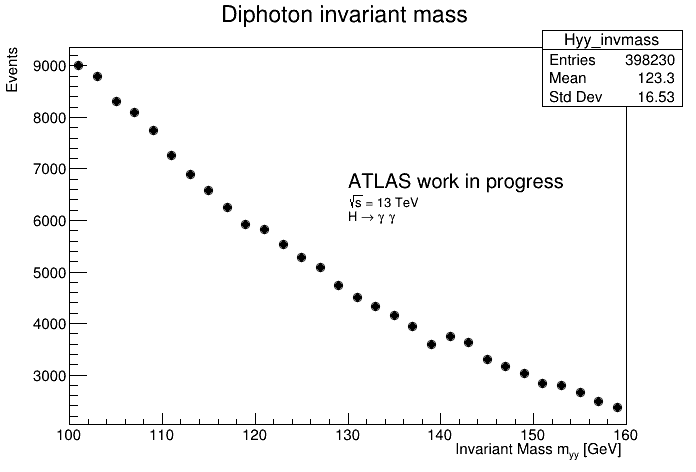

In [12]:
//hist->SetFillColorAlpha(kBlue, 0.5);
//hist->SetFillStyle(3001);
hist->SetMarkerStyle(20);
hist->SetMarkerColor(kBlack);
//hist->SetFillStyle(1001);
//hist->SetFillColor(kBlue);
hist->Draw("P");

TLatex l;
l.SetNDC();
l.SetTextFont(42);
l.SetTextColor(kBlack);
l.SetTextSize(0.045);  
l.DrawLatex(0.50,0.6,"ATLAS work in progress");

TLatex o;
o.SetNDC();
o.SetTextFont(42);
o.SetTextColor(kBlack);
o.SetTextSize(0.03);
double dely = 0.04; 
o.DrawLatex(0.50,0.6-dely, Form("#sqrt{s} = 13 TeV"));
o.DrawLatex(0.50,0.57-dely, Form("H #rightarrow #gamma #gamma"));

canvas->Draw();

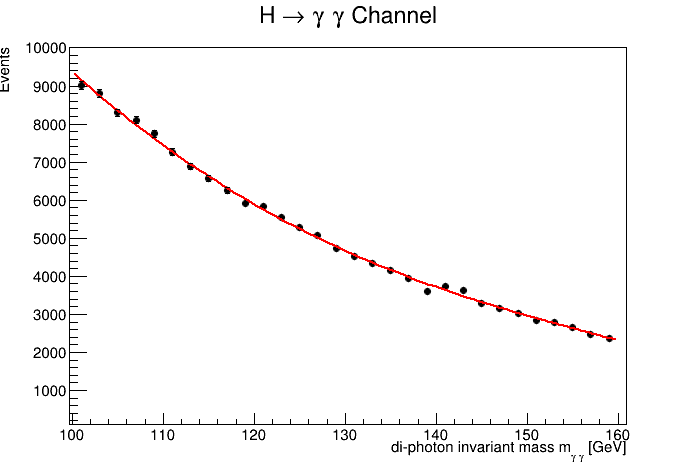

1	101	9015	0	94.9474		9015
2	103	8804	0	93.8296		8804
3	105	8303	0	91.1208		8303
4	107	8099	0	89.9944		8099
5	109	7746	0	88.0114		7746
6	111	7263	0	85.2232		7263
7	113	6885	0	82.9759		6885
8	115	6575	0	81.0864		6575
9	117	6245	0	79.0253		6245
10	119	5926	0	76.9805		5926
11	121	5823	0	76.3086		5823
12	123	5542	0	74.4446		5542
13	125	5283	0	72.6842		5283
14	127	5080	0	71.2741		5080
15	129	4745	0	68.884		4745
16	131	4509	0	67.1491		4509
17	133	4335	0	65.8407		4335
18	135	4156	0	64.467		4156
19	137	3950	0	62.849		3950
20	139	3596	0	59.9667		3596
21	141	3742	0	61.1719		3742
22	143	3633	0	60.2744		3633
23	145	3298	0	57.4282		3298
24	147	3157	0	56.1872		3157
25	149	3028	0	55.0273		3028
26	151	2838	0	53.2729		2838
27	153	2789	0	52.811		2789
28	155	2656	0	51.5364		2656
29	157	2481	0	49.8096		2481
30	159	2367	0	48.6518		2367
 FCN=38.1464 FROM HESSE     STATUS=NOT POSDEF     31 CALLS         201 TOTAL
                     EDM=1.51238e-07    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER 

In [18]:
float xmin = 100, xmax = 160;
float step_size = 2;

float x = xmin+step_size/2; // x center of the first bin
int npoint = 1; // First point of the graph

vector<float> myy_data;
vector<float> myy_data_error;

while (x < 160) // 110 is the maximum value of the X axis
{
    //npoint = graph->GetN();
    int bin = hist->FindBin(x); //Find the bin in which x should be
    float y = hist->GetBinContent(bin); //Give the number of events in the bin determined by the x value
    // statistical error on the data
    float ex = 0.0; // No error on x values
    float ey = TMath::Sqrt(y);
    myy_data.push_back(y);
    myy_data_error.push_back(ey);
    graph->SetPoint(npoint, x, y);
    graph->SetPointError(npoint, 0, ey); // No errors in x values, only in the y values.
    cout << npoint << "\t" << x << "\t" << y << "\t" << ex << "\t" << ey << "\t" "\t" << myy_data[npoint-1] << endl;
    x += step_size; // x values go between the middle point of each bin until reach the last one (159)
    npoint++;
}

// fits

TF1 *model = new TF1("model", "gaus+pol4", xmin, xmax);
graph->Fit("model", "R");
float p0, p1, p2, p3, p4;
p0 = model->GetParameter(0);
p1 = model->GetParameter(1);
p2 = model->GetParameter(2);
p3 = model->GetParameter(3);
p4 = model->GetParameter(4);

cout << "p0: " << p0 << "   p1: " << p1 << "    p2: " << p2 << "   p3: " << p3 << "   p4: " << p4 << endl; 

vector<float> background;
float x_bkg = xmin;

vector<float> signal;
for(int ii=0; ii < npoint-1; ii++)
{
    x_bkg += step_size/2;  
    float bkg = p0 + p1*x_bkg + p2*pow(x_bkg, 2) + p3*pow(x_bkg, 3) + p4*pow(x_bkg, 4);
    background.push_back(bkg);
    float sig = myy_data[ii] - background[ii];
    signal.push_back(sig);
    cout << ii+1 << "\t" << myy_data[ii] << "\t" << background[ii] << "\t" "\t" << signal[ii] << endl;
    
}
// Title graph
graph->SetTitle("H #rightarrow #gamma #gamma Channel");

// x-axis label
graph->GetXaxis()->SetTitle("di-photon invariant mass m_{#gamma #gamma} [GeV]");

// y-axis label
graph->GetYaxis()->SetTitle("Events");

// x-axis range
graph->GetXaxis()->SetRangeUser(xmin, xmax);

// y-axis range
//graph->SetMinimum(0);

//graph->SetMarkerSize(1);

//graph->Draw("AP");
//canvas->SetLogy();

// x-axis range
//graph->GetXaxis()->SetLimits(100, 160);

// y-axis range
graph->SetMinimum(100);
graph->SetMarkerStyle(20);
graph->SetMarkerSize(0.9);
graph->Draw("AP");
//graph->Fit("polinomic fit", "R"); // Adding "R" to fit in the range xmin to xmax
//graph->Fit("gaussian fit", "R");
//graph->Fit("model", "R");
canvas->Draw();